In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
path = '../data/movielens/'

In [9]:
ratings_df = pd.read_csv(path + 'ratings.csv')
tags_df    = pd.read_csv(path + 'tags.csv')
movies_df  = pd.read_csv(path + 'movies.csv') 

In [14]:
print(ratings_df.shape)
ratings_df.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [25]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [15]:
print(tags_df.shape)
tags_df.head()

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [26]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [16]:
print(movies_df.shape)
movies_df.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


# `ratings_df`

In [17]:
len(ratings_df['userId'].unique())

610

In [19]:
len(ratings_df['movieId'].unique())

9724

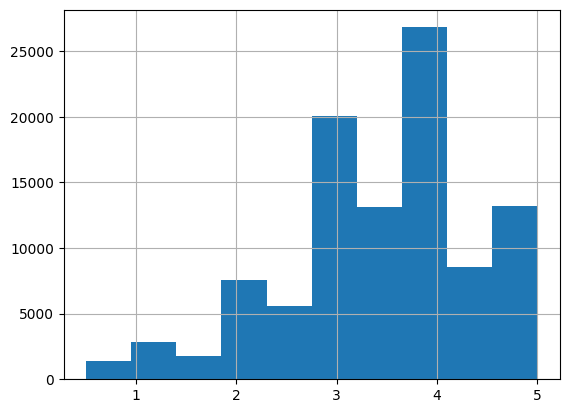

In [34]:
ratings_df['rating'].hist();

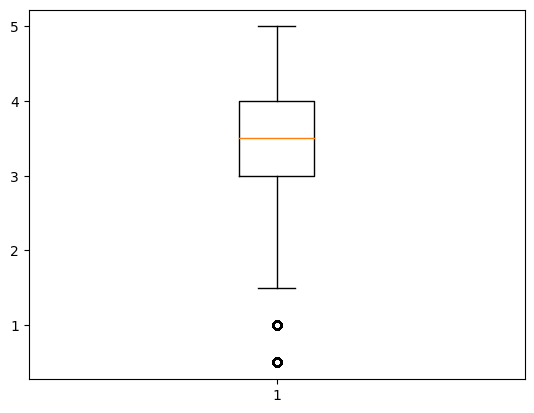

In [23]:
plt.boxplot(ratings_df['rating']);

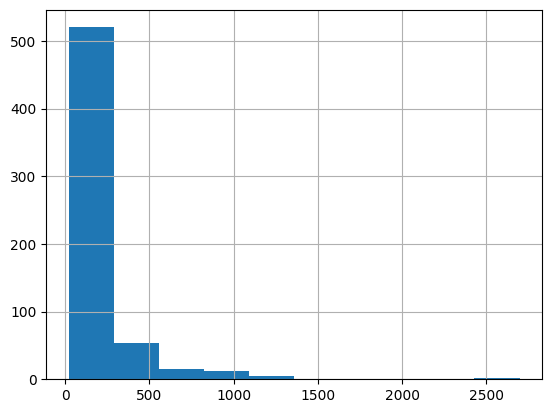

In [32]:
ratings_df.groupby('userId')['rating'].count().hist();

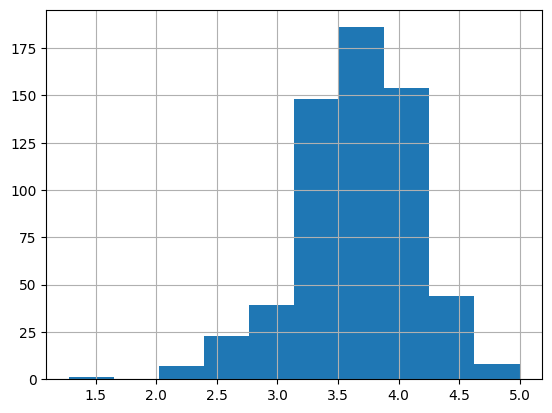

In [33]:
ratings_df.groupby('userId')['rating'].mean().hist();

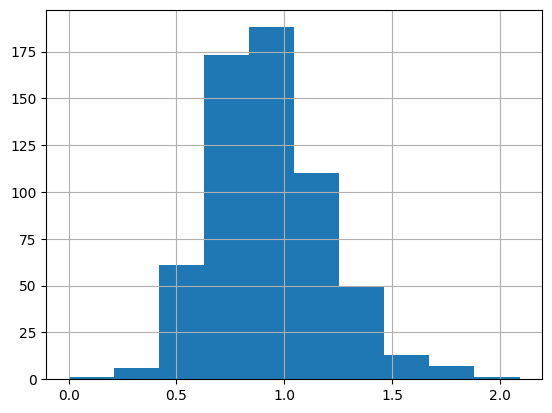

In [35]:
ratings_df.groupby('userId')['rating'].std().hist();

<AxesSubplot:>

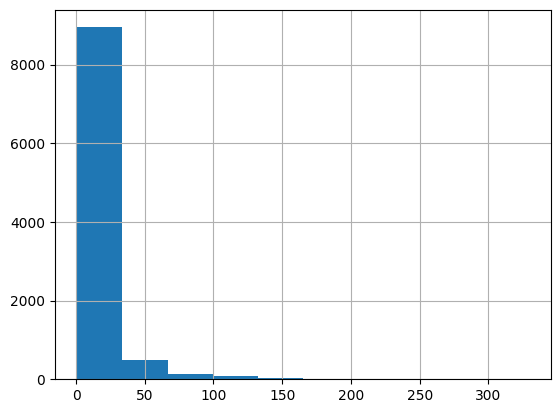

In [38]:
ratings_df.groupby('movieId')['userId'].count().hist()

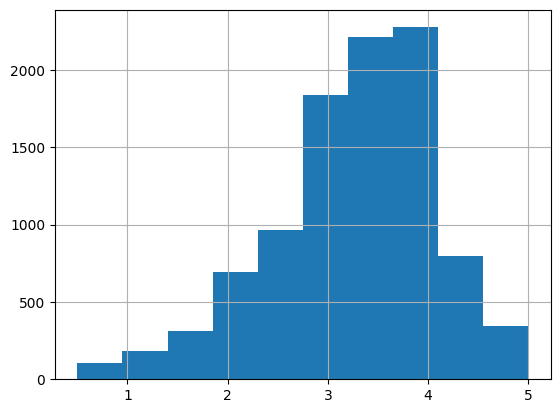

In [42]:
ratings_df.groupby('movieId')['rating'].mean().hist();

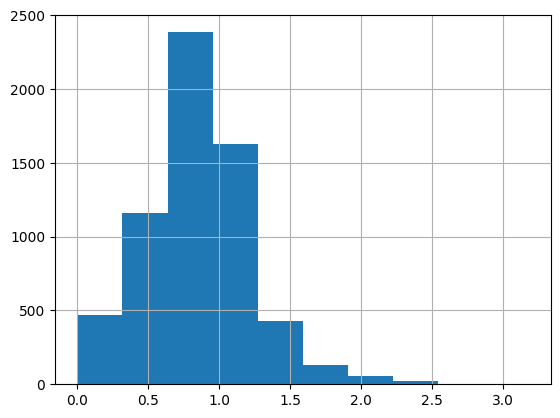

In [43]:
ratings_df.groupby('movieId')['rating'].std().hist();

# 장르 분석

In [46]:
import itertools

In [48]:
all_genres = [x.split('|') for x in movies_df['genres'].values]

all_genres_unique = list(set(itertools.chain(*all_genres)))
print(f'장르의 수 = {len(all_genres_unique)}')
all_genres_unique

장르의 수 = 20


['Crime',
 'Romance',
 'Film-Noir',
 'Children',
 'War',
 'Comedy',
 'Fantasy',
 'Western',
 'Sci-Fi',
 'IMAX',
 'Horror',
 'Musical',
 'Mystery',
 'Drama',
 'Action',
 'Animation',
 'Adventure',
 'Documentary',
 'Thriller',
 '(no genres listed)']

In [49]:
# movie-genre matrix

movie_genre_df = movies_df['genres'].str.get_dummies(sep='|')

In [50]:
movie_genre_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- 장르끼리 동시성 상관관계

In [54]:
import seaborn as sns

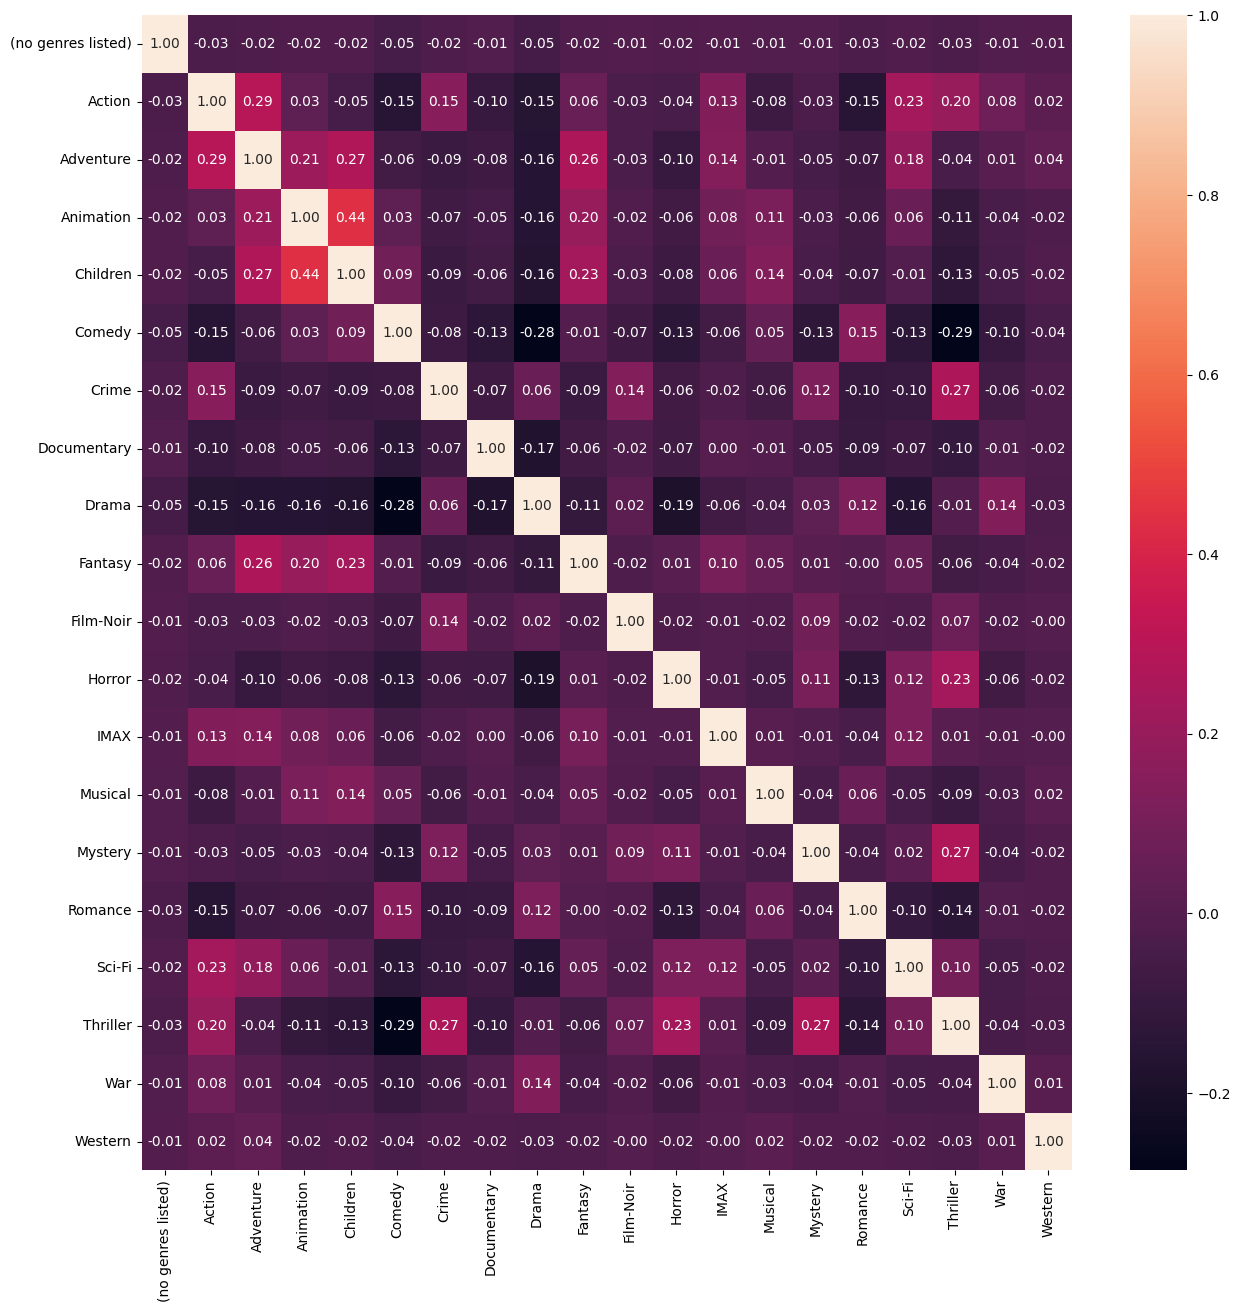

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(movie_genre_df.corr(), annot=True, fmt='.2f');

- 특정 장르 rating 값

In [68]:
movies_df_2 = pd.concat([movies_df, movie_genre_df], axis=1)

In [70]:
movies_df_2.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
ratings_genres_df = pd.merge(ratings_df, movies_df_2.drop(['title', 'genres'], axis=1), on='movieId')

In [81]:
for col in all_genres_unique:
    mean_val = (ratings_genres_df[col] * ratings_genres_df['rating']).sum() / (ratings_genres_df[col].sum())
    print(f'{col} 장르의 평균 rating = {mean_val:.2f}')

Crime 장르의 평균 rating = 3.66
Romance 장르의 평균 rating = 3.51
Film-Noir 장르의 평균 rating = 3.92
Children 장르의 평균 rating = 3.41
War 장르의 평균 rating = 3.81
Comedy 장르의 평균 rating = 3.38
Fantasy 장르의 평균 rating = 3.49
Western 장르의 평균 rating = 3.58
Sci-Fi 장르의 평균 rating = 3.46
IMAX 장르의 평균 rating = 3.62
Horror 장르의 평균 rating = 3.26
Musical 장르의 평균 rating = 3.56
Mystery 장르의 평균 rating = 3.63
Drama 장르의 평균 rating = 3.66
Action 장르의 평균 rating = 3.45
Animation 장르의 평균 rating = 3.63
Adventure 장르의 평균 rating = 3.51
Documentary 장르의 평균 rating = 3.80
Thriller 장르의 평균 rating = 3.49
(no genres listed) 장르의 평균 rating = 3.49


- 연도별 분석도 가능